NIA Python Bootcamp UNIT 3 - Wednesday July 19, 2017

# UNIT 1 review

1. Python ecosystem of tools
2. Jupyter Notebook is code, output and documentation all in one document
3. Type code into cells, and to run them you press Shift-Enter
4. Different data types for different data
4. Tab completion reduces typing, shows you pop-up menu of all the things you can do with that piece of data
5. Operators take one or more input values and turn them into other values *based on the input values type*
6. Converting data from one type to another using the function syntax, e.g., <code>int()</code>

# UNIT 2 Review

1. Exploring data types using the <code>TAB</code> key
2. Python syntax for taking slices of iterables
1. NumPy arrays: basic math operations in 1-D and 2-D (e.g., row-wise and column-wise eman)
1. Subselecting based on a boolean criterion
1. Example: Images as 3-D matrices

# UNIT 3: 
3. PANDAS DataFrames
1. Simple and complex sorting

## PANDAS DataFrame

* pandas = [Python Data Analysis Library](http://pandas.pydata.org/)
* Emulate R's <code>data.frame</code> structure.
* Basically a NumPy matrix with
    * Row and column names
    * Can have columns of different types
    * Handles missing data better

## Load the PANDAS package into memory using <code>import()</code>

In [1]:
import pandas as pd

## Use PANDAS <code>read_*</code> functions to import data

* There are many functions to import data
* Type <code>pd.read_</code> then <code>TAB</code> to see all the import functions

In [ ]:
pd.read_

## Read data from file or URL

In [2]:
titanic_data_url  = "http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls"

In [4]:
%load_ext rpy2.ipython

In [7]:
titanic = pd.read_excel( titanic_data_url )

In [8]:
%%R -i titanic
library(tidyverse)

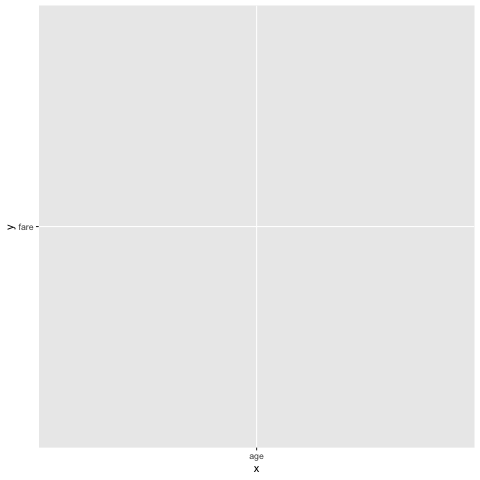

In [11]:
%%R
ggplot( titanic ) + geom_line( aes( x="age", y='fare' ) )

In [9]:
print('hi')

hi


## Return type is a DataFrame

In [ ]:
type(titanic)

## What did we just load?

In [ ]:
titanic.shape

### Change the number of rows Pandas will display using the <code>set_option()</code> function

Use the word <code>None</code> if you want to display all of them.

In [ ]:
pd.set_option( 'display.max_rows', 50 )

### See the first N rows using <code>.head(N)</code>

Defaults to first 5

In [ ]:
titanic.head(2)

### See the last N rows using <code>.tail(N)</code>

Defaults to last 5.

In [ ]:
titanic.tail(1)

### See random N rows using <code>.sample(N)</code>

In [ ]:
titanic.sample(3)

## <code>len()</code> return number of observations (rows)

In [ ]:
len(titanic)

## <code>.shape</code> attribute gives the shape

In [ ]:
titanic.shape

## <code>.describe()</code>: Get basic statistics across all columns

* Detects which columns are quantitative gives descriptive stats for those

In [ ]:
titanic.describe()

## <code>.count()</code> give number of non-empty cells

In [ ]:
titanic.count()

## DataFrame row and column headers

* Like a NumPy array, but with column and row headers.
* Enables slicing by headers, and not just indices like with NumPy arrays
* The collection of row headers is stored in the <code>.index</code> attribute.
* The collection of column headers is stored in the <code>.columns</code> attribute.

In [ ]:
titanic.columns

In [ ]:
titanic.index

## Get a single column

Two ways to do it:

1. Use the "object-oriented" style of [API](https://en.wikipedia.org/wiki/Application_programming_interface), i.e., the "dot."
1. Use the <code>dict</code> style, i.e., key-value style (put the column name into brackets, get the column)
2. The returned data type is a PANDAS Series object, which keeps the index from the DataFrame attached

In [ ]:
titanic.columns

In [ ]:
titanic['home.dest']

## using .values

In [ ]:
titanic['home.dest'].values

## <code>.value_counts()</code>

In [ ]:
titanic['sex']

In [ ]:
titanic.sex.value_counts()

## Use <code>.pivot_table()</code> to have a breakdown of the data

### For categorical data, use <code>aggfunc='count'</code>

In [ ]:
titanic.pivot_table?

In [ ]:
titanic.count()

In [ ]:
titanic.pivot_table( values='survived', index='pclass',
                    columns='sex', aggfunc='count',
                    margins=True)

### For non-categorical data, can use another statistical measure for aggregation, like mean

In [ ]:
titanic.pivot_table( values='age', index='sex',
                    columns='pclass',
                    aggfunc='mean', margins=True)

## Quick figures

* Execute this Jupyter command ```%matplotlib inline``` before executing code that makes figures to get Jupyter to render them as output.

In [ ]:
%matplotlib inline

### Univarate histograms

In [ ]:
titanic.age.hist?

In [ ]:
thing = titanic.age

In [ ]:
type( thing)

In [ ]:
thing.hist?

In [ ]:
titanic.age.hist()

### Bivariate scatter plot using the <code>.plot</code> attribute

In [ ]:
titanic.plot.scatter( 'age', 'fare' )

## Missing data in PANDAS

* Represented as <code>np.nan</code>, which stands for "Not A Number"
* NaN has type <code>float</code>
* No missing data representation for an integer!
    * Either convert all to floats to use NaN (recommended!), or
    * Convert values into strings and store empties as "" (less recommended)
    * Establish a "flag" value, e.g., -999 and filter out those before using (not recommended!)

In [ ]:
import numpy as np

In [ ]:
np.nan

In [ ]:
type( np.nan )

## Column data types
* A single column of data within a PANDAS <code>DataFrame</code> is called a <code>Series</code>.
* All values within a <code>Series</code> must be of the same type.
* Use the <code>.dtypes</code> attribute to check data types for each column

In [ ]:
titanic.head(3)

In [ ]:
titanic.count()

In [ ]:
titanic.dtypes

## Column data types may hint at missing values

When using <code>pd.read_csv()</code> and <code>pd.read_excel()</code> to load a file form disk, PANDAS will try to pick a data type for a column that makes sense.

* If a <code>float64</code> (just a fancy float), then missing values in the form of NaN are possible
    * Use <code>.count()</code> to count non-empty (non-NaN) values
* If an <code>int64</code> (just a fancy int), then probably no missing values in that column
* If an <code>object</code>, this almost always means it's a string in there
    * Can represent missing values as <code>""</code>, but <code>.count()</code> only works for <code>float</code> data types!

In [ ]:
some_emptys = pd.Series( ["","asdf","","","","27",""] )
print( some_emptys.dtype )
some_emptys.count()

### Coerce to numeric values using <code>pd.to_numeric()</code>

In [ ]:
some_emptys = pd.to_numeric( some_emptys, errors='coerce')

In [ ]:
some_emptys

In [ ]:
print( some_emptys.dtype )
some_emptys.count()

## Statistics on a DataFrame ignore NaNs (as one might expect)

* In other words, doesn't count missing values as 0

In [ ]:
titanic.count()

In [ ]:
titanic.age.describe()

## Using the Seaborn Package for visualization

* Browse [this page](https://seaborn.pydata.org/examples/index.html) to see all the types of nice figures you can make

In [13]:
import seaborn as sns

In [14]:
import matplotlib.pyplot as plt

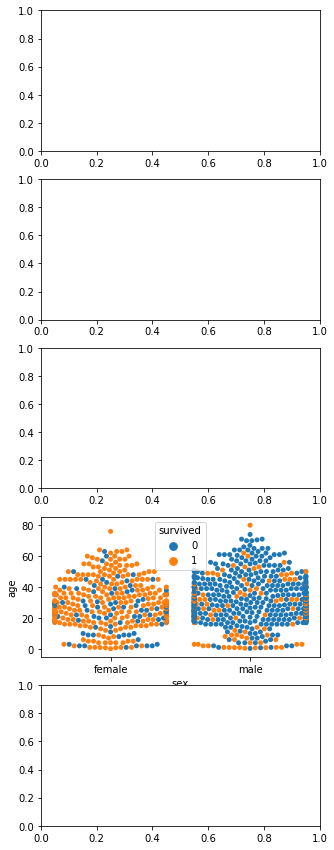

In [19]:
fig, axes = plt.subplots( nrows=5, figsize=(5,15) )

sns.swarmplot( x='sex', y='age', hue='survived',
              data=titanic, ax=axes[3] )
#fig.savefig( 'testytest.pdf')

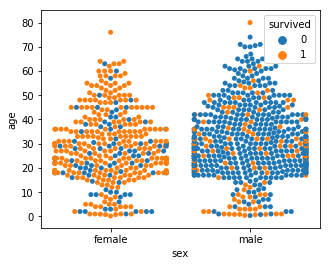

In [17]:
fig

In [ ]:
type( fig )

In [ ]:
type( ax)

In [ ]:
ax.

In [ ]:
sns.swarmplot?

In [ ]:
sns.swarmplot( x='pclass', y='age', hue='survived',
              data=titanic )

## Subselecting based on one of the variables

In [ ]:
titanic.shape

In [ ]:
titanic.sex.value_counts()

In [ ]:
titanic.sex.head()

In [ ]:
titanic.sex == 'male'

In [ ]:
bool_array = titanic.sex == 'male'

In [ ]:
len(bool_array)

In [ ]:
(titanic.sex == 'male').head()

In [ ]:
male = titanic[ titanic.sex == 'male' ]

In [ ]:
# Boolean selector array have to be the sahe shape as the array itself!!
bool_array = [True]*1000

In [ ]:
#titanic[ bool_array ]

In [ ]:
male.shape

In [ ]:
gender_tf = titanic.sex == 'male'

In [ ]:
gender_tf.shape

In [ ]:
male.shape

In [ ]:
female = titanic[ titanic.sex == 'female']

In [ ]:
female.shape

In [ ]:
sns.swarmplot( x='pclass', y='age', hue='survived', 
              data=male)

In [ ]:
sns.swarmplot( x='pclass', y='age', hue='survived',
              data=female )

## Slicing by rows and columns using <code>.loc[]</code>

In [ ]:
subset = titanic[ titanic.age < 25 ]

In [ ]:
subset.shape

In [ ]:
subset = titanic.loc[ titanic.age < 25 ]

In [ ]:
subset.shape

# Complex sort

In [ ]:
age_bool = titanic.age < 10

In [ ]:
age_bool.value_counts()

In [ ]:
class_bool = titanic.pclass == 1

In [ ]:
class_bool.value_counts()

In [ ]:
age_class_bool = age_bool & class_bool

In [ ]:
age_class_bool.value_counts()

In [ ]:
titanic.loc[ age_class_bool, 'age' ]

In [ ]:
len(subset)

## Using <code>.sort_values()</code> for simple or complex sorting

In [ ]:
titanic.sort_values?

In [ ]:
titanic.shape

In [ ]:
titanic.sort_values( by=['pclass','age']).head()

In [ ]:
titanic.sort_values( by=['pclass','age'],
                   ascending=False).head()

In [ ]:
titanic['home.dest'].sample(10)